## Hydrograph Plot:

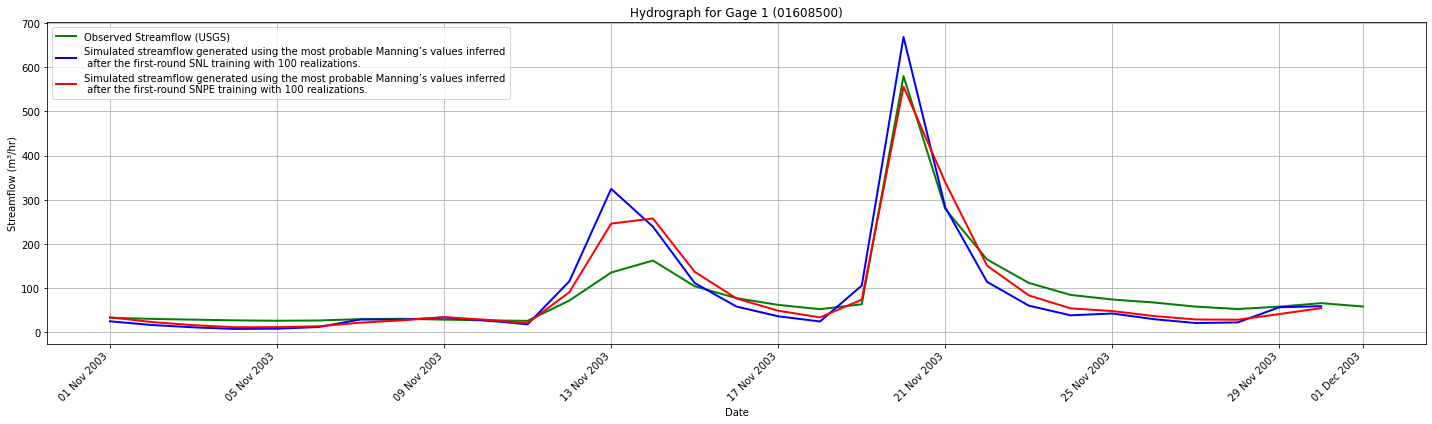

In [6]:
# ----------------------------------------------------
# Import Libraries 
# ----------------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ----------------------------------------------------
# Set Base Directory and Station ID
# ----------------------------------------------------
station_id = "01608500"

# ----------------------------------------------------
# Load Observed and Baseline Data
# ----------------------------------------------------
df_obs = pd.read_csv("/home/ms6730/SBI_calibration/training_with_100_realizations_gage_1/first_round_training/SNL_surrogate/excel_streamflow/streamflow_daily_USGS.csv")
df_SNL= pd.read_csv("/home/ms6730/SBI_calibration/training_with_100_realizations_gage_1/first_round_training/SNL_surrogate/excel_streamflow/streamflow_daily_100_range_0.09_0.3_SNL.csv")
df_SNPE= pd.read_csv("/home/ms6730/SBI_calibration/training_with_100_realizations_gage_1/first_round_training/SNL_surrogate/excel_streamflow/streamflow_sim_100_sim.csv")
# ----------------------------------------------------
# Convert and Align Date Columns and Drop First 5 Days
# ----------------------------------------------------
dates_obs = pd.to_datetime(df_obs["date"])[5:]
df_obs = df_obs.iloc[5:].reset_index(drop=True)

dates_SNL= pd.to_datetime(df_SNL["date"])[5:]
df_SNL = df_SNL.iloc[5:].reset_index(drop=True)

dates_SNPE= pd.to_datetime(df_SNPE["date"])[5:]
df_SNPE = df_SNPE.iloc[5:].reset_index(drop=True)


# Plot observed streamflow
plt.figure(figsize=(20, 6)) 
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, 
         label='Observed Streamflow (USGS)', zorder=10)
plt.plot(dates_SNL, df_SNL[station_id], color='blue', linewidth=2, 
         label='Simulated streamflow generated using the most probable Manning’s values inferred\n after the first-round SNL training with 100 realizations.', 
         zorder=10)
plt.plot(dates_SNPE, df_SNPE[station_id], color='red', linewidth=2, 
         label='Simulated streamflow generated using the most probable Manning’s values inferred\n after the first-round SNPE training with 100 realizations.', 
         zorder=10)

# Titles and labels
plt.title(f"Hydrograph for Gage 1 ({station_id})")
plt.xlabel("Date")
plt.ylabel("Streamflow (m³/hr)")
plt.legend(loc="upper left")
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# ----------------------------------------------------
# Save the Figure
# ----------------------------------------------------
output_path = "/home/ms6730/SBI_calibration/training_with_100_realizations_gage_1/first_round_training/SNL_surrogate/hydrograph_SNPE_SNL_observed_01608500.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# ----------------------------------------------------
# Show Plot
# ----------------------------------------------------
plt.show()
